Objectif:
    
Notre but est de réaliser une régression linéaire entre le montant du crédit et la durée est de comprendre la relation
entre ces deux variables dans le contexte de l'octroi de crédit. Voici nos objectifs :
-Évaluation de l'impact financier :on vouloir déterminer dans quelle mesure le montant 
du crédit demandé par un emprunteur influence la durée du crédit accordée. 

-Identification des segments de marché ::Par exemple, cela pourrait nous aider à déterminer 
les montants de crédit optimaux à accorder aux emprunteurs en fonction de la durée souhaitée du crédit,
Cela pourrait permettre aux prêteurs de personnaliser leurs offres de produits pour répondre aux besoins 
spécifiques de ces segments.

# Régression linéaire simple

Problématique :

Comment le montant du crédit influence-t-il la durée du crédit pour les emprunteurs ?

Question à répondre :

Est-ce qu'il y a une relation linéaire entre le montant du crédit et la durée du crédit ?
Pour répondre à cette question, nous allons appliquer une régression linéaire simple suivre avec nous les étapes :

## Importation des packages

In [137]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement des données

In [138]:
#Lire les fichiers CSV
df = pd.read_csv('C:\\Users\\soumi\\Downloads\\german_credit_data.csv')

print(df.head())
print(df[["att2", "att5"]].agg(["mean", "std"]))
print(df[["att2", "att5"]].var())
print(df[["att2", "att5"]].cov())
print(df[["att2", "att5"]].corr())

X=df['att5']
Y=df['att2']

  att1  att2 att3 att4  att5 att6 att7  att8 att9 att10  ...  att12 att13  \
0  A11     6  A34  A43  1169  A65  A75     4  A93  A101  ...   A121    67   
1  A12    48  A32  A43  5951  A61  A73     2  A92  A101  ...   A121    22   
2  A14    12  A34  A46  2096  A61  A74     2  A93  A101  ...   A121    49   
3  A11    42  A32  A42  7882  A61  A74     2  A93  A103  ...   A122    45   
4  A11    24  A33  A40  4870  A61  A73     3  A93  A101  ...   A124    53   

   att14 att15 att16  att17 att18  att19 att20 class  
0   A143  A152     2   A173     1   A192  A201     1  
1   A143  A152     1   A173     1   A191  A201     2  
2   A143  A152     1   A172     2   A191  A201     1  
3   A143  A153     1   A173     2   A191  A201     1  
4   A143  A153     2   A173     2   A191  A201     2  

[5 rows x 21 columns]
           att2         att5
mean  20.903000  3271.258000
std   12.058814  2822.736876
att2    1.454150e+02
att5    7.967843e+06
dtype: float64
              att2          att5
att2   

Comme vous pouvez le constater, nous avons une corrélation de 62% entre le montant du crédit et la durée.

# le nuage du point 

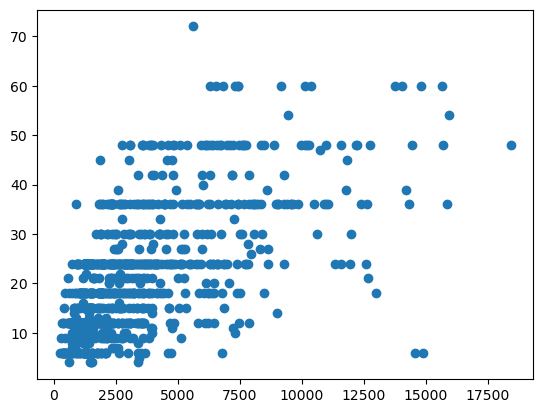

In [139]:
plt.plot(X,y,'o')

             Figure 1 :Représentation du nuage des points 

interprétation:
On constate que la distribution des points est presque linéaire,
et nous observons une corrélation positive entre le montant du crédit et la durée.
Par conséquent, nous pouvons effectuer une régression linéaire pour explorer davantage cette relation.

## Visualisation

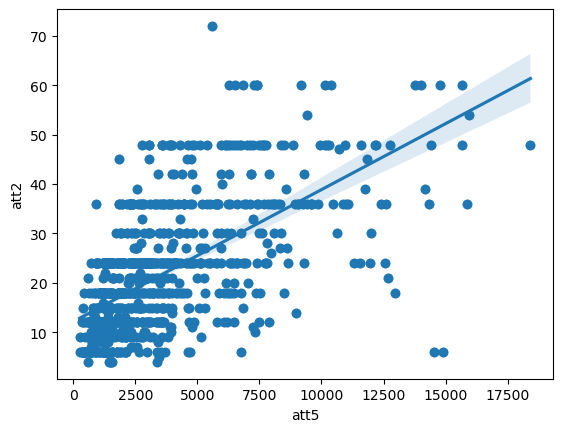

In [140]:
#seaborn.regplot() :
#Cette méthode est utilisée pour tracer les données et un modèle de régression linéaire

plt.scatter(df['att5'], df['att2'])  # Tracer le nuage de points avec plt.scatter()
sns.regplot(x='att5', y='att2', data=df)  # Tracer la régression linéaire avec sns.regplot()

plt.show()  # Afficher le tracé

                        Figure 2: la Droite de régression

                   interprétation:
On observe une droite qui suggère une relation linéaire entre la variable explicative 
(montant du crédit) et la variable à expliquer (la durée).
Cette droite est ajustée pour minimiser l'écart entre les valeurs observées et les valeurs prédites. 
Ainsi, il semble exister une relation linéaire entre le montant du crédit et la durée.

In [141]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   att2   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     639.7
Date:                Sun, 12 May 2024   Prob (F-statistic):          1.86e-109
Time:                        11:30:48   Log-Likelihood:                -3660.6
No. Observations:                1000   AIC:                             7325.
Df Residuals:                     998   BIC:                             7335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1689      0.456     26.685      0.0

# interprétation de résultats obtenue :

    No. Observations: est le nombre d'observations n=1000
    Df Residuals: les degrés de liberté des résidus n-2=998  
    aux tests d’hypothèse H0 : βi = 0 contre H1 : βi != 0
    Df Model:les degrés de liberté du modèle .
    R-squared:e coefficient de détermination égal 0,391, indique 
    un bon ajustement du modèle de régression linéaire aux données,
    et que le  modèle explique 39 % de la variation de y en fonction de x.
    Adj. R-squared:le coefficient de détermination ajusté .                      

## Création du modèle

In [143]:
x_new = sm.add_constant(np.arange(10))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
[12.1689022  12.17157215 12.1742421  12.17691205 12.179582   12.18225195
 12.1849219  12.18759185 12.1902618  12.19293176]


résultat obtenue :
                    on avoir des prédictions de Y pour des nouvelles valeurs de X.

# Régression multiple

## Importation des packages

In [144]:
import pandas as pd
import statsmodels.api as sm

## Chargement des données

In [145]:
# Read a csv file into Pandas Dataframe
df = pd.read_csv('C:\\Users\\soumi\\Downloads\\german_credit_data.csv')
print(df.head())


  att1  att2 att3 att4  att5 att6 att7  att8 att9 att10  ...  att12 att13  \
0  A11     6  A34  A43  1169  A65  A75     4  A93  A101  ...   A121    67   
1  A12    48  A32  A43  5951  A61  A73     2  A92  A101  ...   A121    22   
2  A14    12  A34  A46  2096  A61  A74     2  A93  A101  ...   A121    49   
3  A11    42  A32  A42  7882  A61  A74     2  A93  A103  ...   A122    45   
4  A11    24  A33  A40  4870  A61  A73     3  A93  A101  ...   A124    53   

   att14 att15 att16  att17 att18  att19 att20 class  
0   A143  A152     2   A173     1   A192  A201     1  
1   A143  A152     1   A173     1   A191  A201     2  
2   A143  A152     1   A172     2   A191  A201     1  
3   A143  A153     1   A173     2   A191  A201     1  
4   A143  A153     2   A173     2   A191  A201     2  

[5 rows x 21 columns]


In [ ]:
on cherche à modelisé la relation entre les different  caracteristiques  et la duration du credit .
    
att2: Duration
    
att5: credit amount  
    
att8: Installment rate in percentage of disposable income
    
att11: Present residence since

## Création du modèle

In [125]:
y=df['att2']
x=df[['att5','att8','att11']]
x=sm.add_constant(x)
# Create a fitted model
lm = sm.OLS(y,x).fit()

# Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   att2   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     277.2
Date:                Sun, 12 May 2024   Prob (F-statistic):          8.72e-131
Time:                        11:07:19   Log-Likelihood:                -3604.7
No. Observations:                1000   AIC:                             7217.
Df Residuals:                     996   BIC:                             7237.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6911      1.179      2.282      0.0

notre variable à expliquer est att2 et les variables explicatives sont att5,att11,att8.
R-squared = 0,45 indique un bon ajustement du modèle de régression linéaire multiple aux données,
environ 45 % de la variabilité observée dans la durée du crédit peut être attribuée à la variation dans les variables explicatives.
on a identifié que l'attribut 11 (durée de résidence actuelle) semble avoir une influence plus importante sur la durée du crédit par rapport à l'attribut 5 (montant du crédit) et l'attribut 8 (taux de versement en pourcentage du revenu disponible).


resultat :
Cette observation peut être interprétée la durée de résidence actuelle des emprunteurs a un impact significatif sur la durée 
du crédit qu'ils demandent. En d'autres termes, les emprunteurs qui ont vécu à leur adresse actuelle pendant une période
plus longue peuvent être plus enclins à demander des crédits sur des périodes plus longues.


# La phase des Prédictions:

In [95]:
ypred = lm.predict(x)
print(ypred)

0      17.567005
1      26.110886
2      14.639822
3      31.856833
4      25.737024
         ...    
995    16.411392
996    25.565506
997    16.480899
998    19.578533
999    24.862188
Length: 1000, dtype: float64


on prédir Y pour des nouvelles valeurs des Xi , et on observe que les valeurs prédite sont très proche aux valeurs observés.